 **DTSA 5509 Supervised Learning Final Project by Joe Hardin**. 
 Data sourced directly from https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook.  It is a subset of the The Behavioral Risk Factor Surveillance System (BRFSS) conducted in 2015. 
 > The Behavioral Risk Factor Surveillance System (BRFSS) is the nation’s premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.  **https://www.cdc.gov/brfss/index.html**
 
# Purpose
Diabetes is a disease that can be fatal if not properly managed.  Approxiamtely 6-11 million people have diabetes and are not diagnosed in the USA( [source](https://diabetesjournals.org/care/article/42/6/994/35979/Diabetes-Diagnosis-and-Control-Missed) ).  Proper diagnoses requires blood test from either a Fasting Glucose Test or a 2 hour plasma glucose test.  Additionally it can cost an American between 25 and 200 dollars to get diagnosed ([source](https://www.talktomira.com/post/what-is-a-diabetes-screening-test-and-how-much-it-costs) ). The time and monetary cost may contribute to people not being tested and subsequently diagnosed.     The purpose of this notebook is to evaluate differnt supervised machine learning techniques to better screen for diabetes.
 
 

In [8]:
%%time
#Cell Runtime 1 s
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

import pprint

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
Balance = ['U/U', #Unbalanced Test Data fed into Model Trained on Unbalanced Train Data 
           'B/B', #Balanced Test Data fed into Model Trained on Balanced Test Data  
           'U/B' ]   #Unbalanced Test Data fed into Model Trained on all Balanced Data       
Comparisons = pd.DataFrame(columns = ["Balance" ,  # One of the options from the Balance List above 
                                      "Model",  #String Descriptor of Model Used 
                                      "Metrics"]) # Scores measuring effectivenes of model including accuracy, precision, recall, and F1 Score
pp = pprint.PrettyPrinter()


/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv
CPU times: user 3.4 ms, sys: 2.09 ms, total: 5.49 ms
Wall time: 7.08 ms


In [9]:
%%time
#Cell Runtime 350 ms

data = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv') # # binary of diabetes state (0 - not diabetic , 1 - prediabetes or diabetes)  Roughly Equal amount of obeservations with a score of 1 as there is with a score of 0


CPU times: user 591 ms, sys: 95.6 ms, total: 687 ms
Wall time: 984 ms


In [10]:
%%time
#Cell Runtime 42 ms
print(data.info())
x = list(data.columns)
x.remove('Diabetes_binary')
y = 'Diabetes_binary'




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [83]:
## Update feature names and raw data here if you want to try one of the other datasets

class Split_data:
  
    def __init__(self, data, x_col, y_col, split):
        
        
        self.x_train = None 
        self.x_test = None 
        self.y_train = None 
        self.y_test = None
        
       
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(data[x_col],data[y_col], test_size=split)


def build_dt(data_X, data_y, max_depth = None, max_leaf_nodes =None):
  
    clf = DecisionTreeClassifier(max_depth = max_depth, max_leaf_nodes = max_leaf_nodes )
    clf.fit(data_X,data_y)
  
    return clf
  
data_split = Split_data(data, x, y, 0.25)



# Data Cleaning

Fortunately , as can be seen below, we have clean data.  There are no obvious null values

In [12]:
%%time
# Cell Runtime ~8 Seconds
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
for c in data.columns:
    string_null = np.array([x in a[2:] for x in data[c]])
    print(c, data[c].isnull().sum(), string_null.sum()) 
for c in data.columns:
    string_null = np.array([x in a[2:] for x in data[c]])
    print(c, data[c].isnull().sum(), string_null.sum()) 

Diabetes_binary 0 0
HighBP 0 0
HighChol 0 0
CholCheck 0 0
BMI 0 0
Smoker 0 0
Stroke 0 0
HeartDiseaseorAttack 0 0
PhysActivity 0 0
Fruits 0 0
Veggies 0 0
HvyAlcoholConsump 0 0
AnyHealthcare 0 0
NoDocbcCost 0 0
GenHlth 0 0
MentHlth 0 0
PhysHlth 0 0
DiffWalk 0 0
Sex 0 0
Age 0 0
Education 0 0
Income 0 0
Diabetes_binary 0 0
HighBP 0 0
HighChol 0 0
CholCheck 0 0
BMI 0 0
Smoker 0 0
Stroke 0 0
HeartDiseaseorAttack 0 0
PhysActivity 0 0
Fruits 0 0
Veggies 0 0
HvyAlcoholConsump 0 0
AnyHealthcare 0 0
NoDocbcCost 0 0
GenHlth 0 0
MentHlth 0 0
PhysHlth 0 0
DiffWalk 0 0
Sex 0 0
Age 0 0
Education 0 0
Income 0 0
CPU times: user 7.91 s, sys: 9.13 ms, total: 7.92 s
Wall time: 7.92 s


In [13]:
%%time
# Cell Runtime 71 ms
print("Amount of people in Unbalanced Data Set with Diabetes or Prediabetes is about " , "{:.1e}".format(sum(data[y])))
print("The amount of people in Unbalanced Data Set without Diabetes or Prediabetes is about ","{:.1e}".format(len(data[y]) - sum(data[y])  ))
print("Which is " , round(100*sum(data[y])/len(data[y]),1), "% of people in the unbalanced dataset are diabetic or are prediabetic")

Amount of people in Unbalanced Data Set with Diabetes or Prediabetes is about  3.5e+04
The amount of people in Unbalanced Data Set without Diabetes or Prediabetes is about  2.2e+05
Which is  13.9 % of people in the unbalanced dataset are diabetic or are prediabetic
CPU times: user 61.3 ms, sys: 910 µs, total: 62.2 ms
Wall time: 61.2 ms


# Exploratory Data Analysis

A quick look at this data set shows a large majority of the raw data is from people who do not have Diabetes (approximately 86%)  This means the our data is unbalanced.  One challenge is that a naive algorithim -- one where it tells everyone that they do not have diabetes -- would achieve an 86% accuracy rate.  Out of context that sounds pretty good, but is obviously useless- and even dangerous.  A fantastic paper/review that covers the complexities of working with unbalnced data can be found here **A Comparative Analysis of Unbalanced Data Handling Techniques for Machine Learning Algorithms to Electricity Theft Detection**  (By Jeanne Pereira and Filipe Saraiva ISBN 978-1-7281-6929-3) Here are some critical quotes from this article:

* The problem with unbalanced data set is known in the literature: if the classes are very unbalanced, the machine learning method will learn how to classify the most common classes, while the less common will not be learned
* (The metircs of rating) machine learning performance suitable for this kind of dataset, like  F1-score , can be better representatives than accuracy.
* Representive Over Sampling (ROS) of the minority data can be used to improve the results of training algorithims


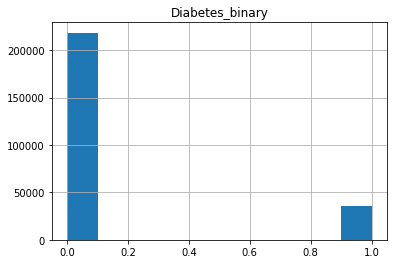

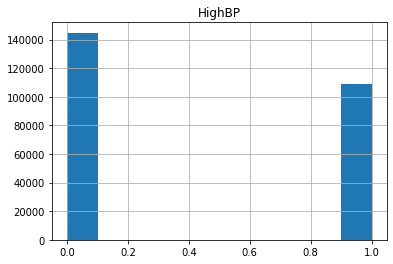

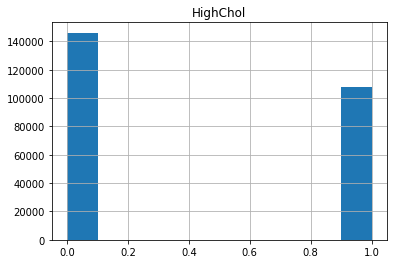

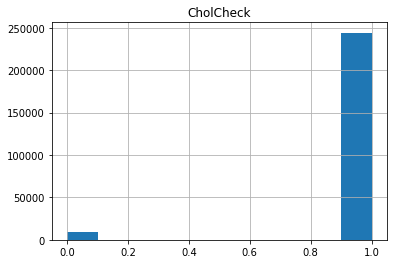

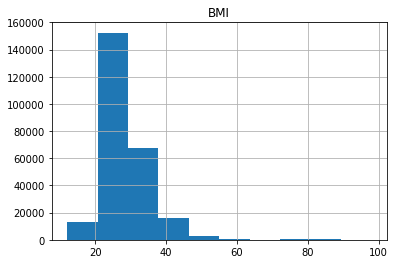

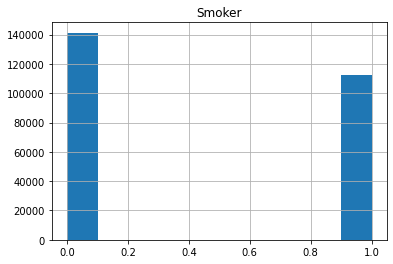

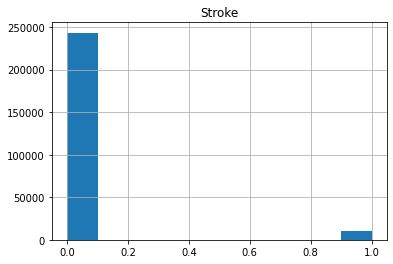

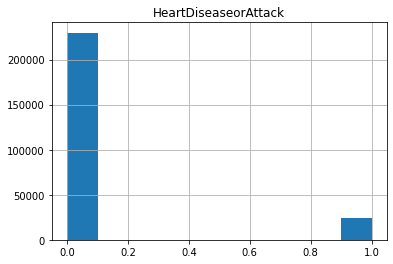

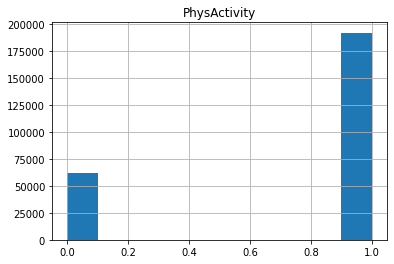

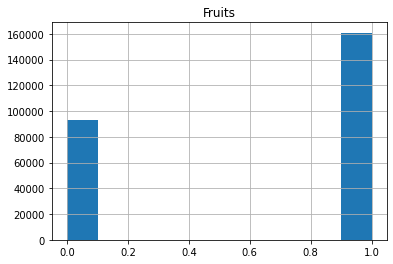

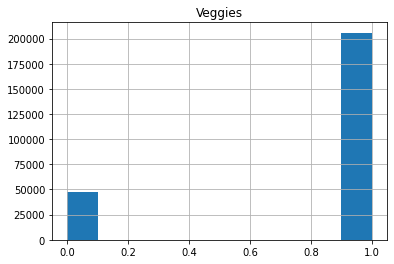

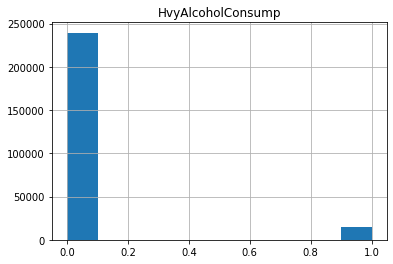

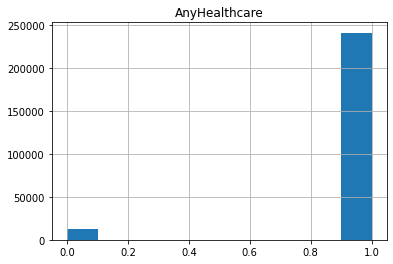

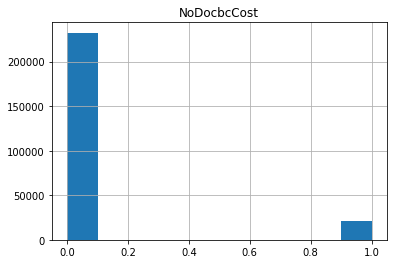

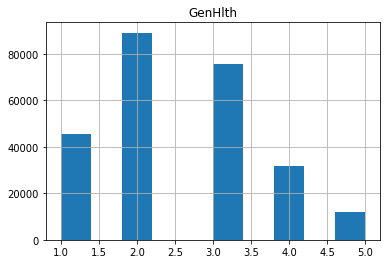

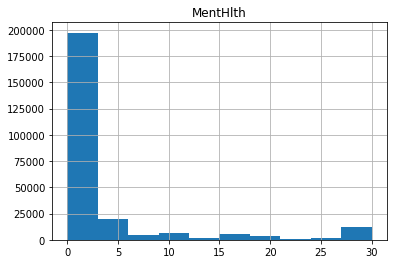

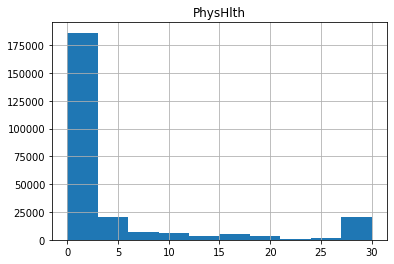

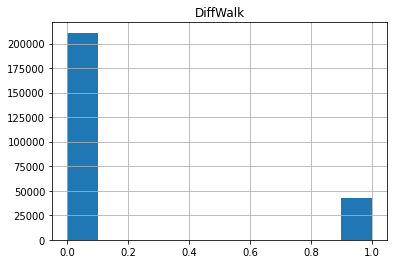

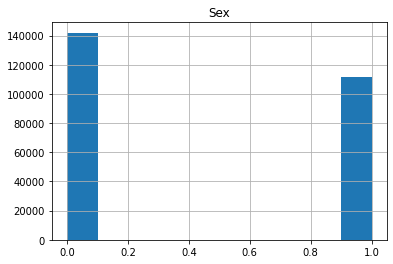

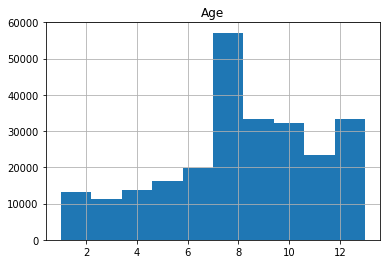

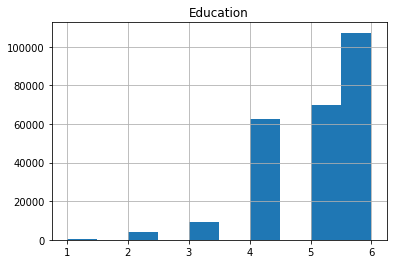

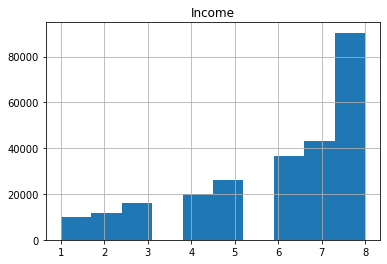

In [14]:
for c in data.columns:
    data[c].hist()
    plt.title(c)
    plt.show()


**There are not any features that are highly correlative with the prevelance of diabetes**

<AxesSubplot:>

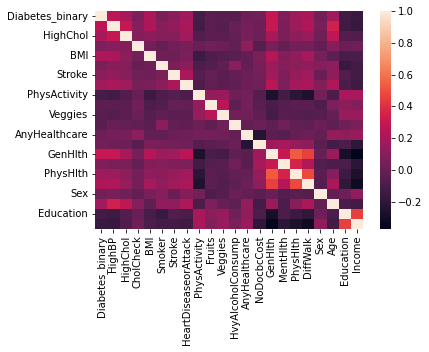

In [15]:
corr_mat = data.corr()
sns.heatmap(corr_mat)


# Logistic Regression

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     21817
         1.0       0.51      0.15      0.23      3551

    accuracy                           0.86     25368
   macro avg       0.69      0.56      0.58     25368
weighted avg       0.83      0.86      0.83     25368



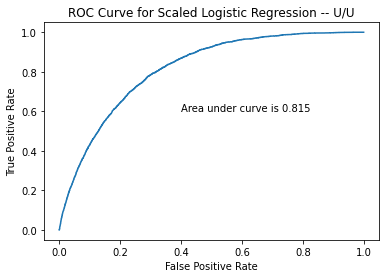

In [16]:


ScaledLogReg = make_pipeline(StandardScaler(), LogisticRegression())
ScaledLogReg.fit(data_split.x_train, data_split.y_train)  # apply scaling on training data
ypp = ScaledLogReg.predict_proba(data_split.x_test)
yhat = ScaledLogReg.predict(data_split.x_test)
pre, rec, th = roc_curve(data_split.y_test, ypp[:,1])
auc = roc_auc_score(data_split.y_test, ypp[:,1])


plt.plot(pre,rec )# 'k.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Scaled Logistic Regression -- U/U")
plt.text(x = .4, y = .6, s = "Area under curve is "+ str(round(auc,3)))

cr = classification_report(data_split.y_test, yhat)
print(cr)





In [42]:
%%time
# Compute time 25 seconds

steps = [ ('scale', StandardScaler()), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = pd.DataFrame.from_dict( cross_validate(pipeline, data[x], data[y], cv=cv,
                         scoring=('f1', 
                                  'recall' , 
                                  'precision', 
                                  'precision_micro',
                                  'accuracy', 
                                  'roc_auc'),
                         return_train_score=True))
                                
scores = scores.mean(axis=0)                  
pp.pprint(scores)






fit_time                 0.714672
score_time               0.236522
test_f1                  0.240947
train_f1                 0.241500
test_recall              0.155506
train_recall             0.155859
test_precision           0.534900
train_precision          0.536089
test_precision_micro     0.863493
train_precision_micro    0.863590
test_accuracy            0.863493
train_accuracy           0.863590
test_roc_auc             0.821971
train_roc_auc            0.822122
dtype: float64
CPU times: user 30.9 s, sys: 15.8 s, total: 46.7 s
Wall time: 17.3 s


In [17]:
%%time
# Compute time 25 seconds

steps = [('over', RandomOverSampler()), ('scale', StandardScaler()), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = pd.DataFrame.from_dict( cross_validate(pipeline, data[x], data[y], cv=cv,
                         scoring=('f1', 
                                  'recall' , 
                                  'precision', 
                                  'precision_micro',
                                  'accuracy', 
                                  'roc_auc'),
                         return_train_score=True))
                                
scores = scores.mean(axis=0)                  
pp.pprint(scores)






fit_time                 1.208701
score_time               0.240517
test_f1                  0.442780
train_f1                 0.443014
test_recall              0.765504
train_recall             0.765804
test_precision           0.311471
train_precision          0.311651
test_precision_micro     0.731548
train_precision_micro    0.731694
test_accuracy            0.731548
train_accuracy           0.731694
test_roc_auc             0.822553
train_roc_auc            0.822679
dtype: float64
CPU times: user 38.5 s, sys: 18.9 s, total: 57.4 s
Wall time: 22.6 s


# Single Decision Tree 

In [18]:
%%time
#Compute Time --  25 seconds

steps = [ ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = pd.DataFrame.from_dict( cross_validate(pipeline, data[x], data[y], cv=cv,
                          scoring=('f1', 
                                  'recall' , 
                                  'precision', 
                                  'precision_micro',
                                  'accuracy', 
                                  'roc_auc'),
                         return_train_score=True))
                                
scores = scores.mean(axis=0)                  
pp.pprint(scores)



fit_time                 1.617683
score_time               0.175597
test_f1                  0.307424
train_f1                 0.979331
test_recall              0.323191
train_recall             0.960409
test_precision           0.293134
train_precision          0.999014
test_precision_micro     0.797113
train_precision_micro    0.994352
test_accuracy            0.797113
train_accuracy           0.994352
test_roc_auc             0.597925
train_roc_auc            0.999842
dtype: float64
CPU times: user 25.1 s, sys: 81.4 ms, total: 25.2 s
Wall time: 25.2 s


In [19]:
%%time
#Cell runtime --  45 seconds

steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = pd.DataFrame.from_dict( cross_validate(pipeline, data[x], data[y], cv=cv,
                          scoring=('f1', 
                                  'recall' , 
                                  'precision', 
                                  'precision_micro',
                                  'accuracy', 
                                  'roc_auc'),
                         return_train_score=True))
                                
scores = scores.mean(axis=0)                  
pp.pprint(scores)



fit_time                 3.651211
score_time               0.177650
test_f1                  0.291487
train_f1                 0.970848
test_recall              0.298435
train_recall             0.996715
test_precision           0.284875
train_precision          0.946291
test_precision_micro     0.797869
train_precision_micro    0.991660
test_accuracy            0.797869
train_accuracy           0.991660
test_roc_auc             0.588773
train_roc_auc            0.999835
dtype: float64
CPU times: user 45.1 s, sys: 486 ms, total: 45.6 s
Wall time: 45.6 s


# AdaBoost

In [20]:
%%time
#Adaboost Model --  2 MINUTES

steps = [ ('model', AdaBoostClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = pd.DataFrame.from_dict( cross_validate(pipeline, data[x], data[y], cv=cv,
                          scoring=('f1', 
                                  'recall' , 
                                  'precision', 
                                  'precision_micro',
                                  'accuracy', 
                                  'roc_auc'),
                         return_train_score=True))
                                
scores = scores.mean(axis=0)                  
pp.pprint(scores)



fit_time                 9.666111
score_time               0.900237
test_f1                  0.278711
train_f1                 0.279616
test_recall              0.187348
train_recall             0.187815
test_precision           0.544163
train_precision          0.547158
test_precision_micro     0.864901
train_precision_micro    0.865175
test_accuracy            0.864901
train_accuracy           0.865175
test_roc_auc             0.826208
train_roc_auc            0.826682
dtype: float64
CPU times: user 2min 20s, sys: 38.4 ms, total: 2min 20s
Wall time: 2min 20s


In [21]:
%%time
#AdaBoost with oversampling --  3 MINUTES 30 Seconds

steps = [('over', RandomOverSampler()), ('model', AdaBoostClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = pd.DataFrame.from_dict( cross_validate(pipeline, data[x], data[y], cv=cv,
                          scoring=('f1', 
                                  'recall' , 
                                  'precision', 
                                  'precision_micro',
                                  'accuracy', 
                                  'roc_auc'),
                         return_train_score=True))
                                
scores = scores.mean(axis=0)                  
pp.pprint(scores)



fit_time                 20.807381
score_time                0.908253
test_f1                   0.444996
train_f1                  0.445270
test_recall               0.770950
train_recall              0.771569
test_precision            0.312767
train_precision           0.312931
test_precision_micro      0.732046
train_precision_micro     0.732133
test_accuracy             0.732046
train_accuracy            0.732133
test_roc_auc              0.826212
train_roc_auc             0.826616
dtype: float64
CPU times: user 4min 11s, sys: 784 ms, total: 4min 12s
Wall time: 4min 12s


# Random Forest

In [22]:
%%time
#Cell Run time ~ 9 minutes

steps = [('model',RandomForestClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = pd.DataFrame.from_dict( cross_validate(pipeline, data[x], data[y], cv=cv,
                          scoring=('f1', 
                                  'recall' , 
                                  'precision', 
                                  'precision_micro',
                                  'accuracy', 
                                  'roc_auc'),
                         return_train_score=True))
                                
scores = scores.mean(axis=0)                  
pp.pprint(scores)



fit_time                 33.781455
score_time                4.019143
test_f1                   0.254892
train_f1                  0.979207
test_recall               0.172679
train_recall              0.963864
test_precision            0.486601
train_precision           0.995046
test_precision_micro      0.859339
train_precision_micro     0.994296
test_accuracy             0.859339
train_accuracy            0.994296
test_roc_auc              0.797883
train_roc_auc             0.999363
dtype: float64
CPU times: user 8min 47s, sys: 3.41 s, total: 8min 50s
Wall time: 8min 50s


In [23]:
%%time
#Cell Run time 14 Minutes 30 Sec

steps = [('over', RandomOverSampler()), ('model',RandomForestClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = pd.DataFrame.from_dict( cross_validate(pipeline, data[x], data[y], cv=cv,
                          scoring=('f1', 
                                  'recall' , 
                                  'precision', 
                                  'precision_micro',
                                  'accuracy', 
                                  'roc_auc'),
                         return_train_score=True))
                                
scores = scores.mean(axis=0)                  
pp.pprint(scores)



fit_time                 65.748514
score_time                4.495790
test_f1                   0.351698
train_f1                  0.970126
test_recall               0.307064
train_recall              0.997238
test_precision            0.411557
train_precision           0.944451
test_precision_micro      0.842274
train_precision_micro     0.991442
test_accuracy             0.842274
train_accuracy            0.991442
test_roc_auc              0.793127
train_roc_auc             0.999765
dtype: float64
CPU times: user 14min 27s, sys: 4.95 s, total: 14min 32s
Wall time: 14min 33s


In [24]:
print(np.logspace(-2,0,10))

[0.01       0.01668101 0.02782559 0.04641589 0.07742637 0.12915497
 0.21544347 0.35938137 0.59948425 1.        ]


In [80]:
depths = range(2,5)
alphas =  np.logspace(-2,0,10)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1)
manualGrid = pd.DataFrame(columns = ['Depth', 'Alpha' , 'Scores'])

for depth in depths:
    for alpha in alphas:
        steps = [('over', RandomOverSampler()), ('model',RandomForestClassifier(max_depth = depth, ccp_alpha = alpha))]
        pipeline = Pipeline(steps=steps)

       
        scores = pd.DataFrame.from_dict( cross_validate(pipeline, data[x], data[y], cv=cv,
                          scoring=('f1', 
                                  'recall' , 
                                  'precision', 
                                  'precision_micro',
                                  'accuracy', 
                                  'roc_auc'),
                         return_train_score=True))
                                
        scores = scores.mean(axis=0)                  
        print( " Depth : " , depth , " Alpha : " , alpha)
        manualGrid[len(manualGrid)] = [depth, alpha, scores]
        pp.pprint(scores)

 Depth :  2  Alpha :  0.01
fit_time                 15.169938
score_time                0.769156
test_f1                   0.425559
train_f1                  0.424904
test_recall               0.759407
train_recall              0.758961
test_precision            0.295693
train_precision           0.295129
test_precision_micro      0.714167
train_precision_micro     0.713639
test_accuracy             0.714167
train_accuracy            0.713639
test_roc_auc              0.805348
train_roc_auc             0.805379
dtype: float64
 Depth :  2  Alpha :  0.016681005372000592
fit_time                 16.091927
score_time                0.751498
test_f1                   0.418435
train_f1                  0.419846
test_recall               0.751825
train_recall              0.754187
test_precision            0.289931
train_precision           0.290944
test_precision_micro      0.708716
train_precision_micro     0.709467
test_accuracy             0.708716
train_accuracy            0.709467
test_

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Depth :  2  Alpha :  0.0774263682681127
fit_time                 15.246873
score_time                0.609778
test_f1                   0.195671
train_f1                  0.195669
test_recall               0.800000
train_recall              0.800000
test_precision            0.111467
train_precision           0.111466
test_precision_micro      0.283601
train_precision_micro     0.283599
test_accuracy             0.283601
train_accuracy            0.283599
test_roc_auc              0.500000
train_roc_auc             0.500000
dtype: float64


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

 Depth :  2  Alpha :  0.1291549665014884
fit_time                 14.917536
score_time                0.605001
test_f1                   0.146755
train_f1                  0.146752
test_recall               0.600000
train_recall              0.600000
test_precision            0.083601
train_precision           0.083599
test_precision_micro      0.427870
train_precision_micro     0.427866
test_accuracy             0.427870
train_accuracy            0.427866
test_roc_auc              0.500000
train_roc_auc             0.500000
dtype: float64


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

 Depth :  2  Alpha :  0.21544346900318834
fit_time                 14.686043
score_time                0.605970
test_f1                   0.146755
train_f1                  0.146752
test_recall               0.600000
train_recall              0.600000
test_precision            0.083601
train_precision           0.083599
test_precision_micro      0.427870
train_precision_micro     0.427866
test_accuracy             0.427870
train_accuracy            0.427866
test_roc_auc              0.500000
train_roc_auc             0.500000
dtype: float64


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Depth :  2  Alpha :  0.3593813663804626
fit_time                 14.817177
score_time                0.601797
test_f1                   0.195671
train_f1                  0.195669
test_recall               0.800000
train_recall              0.800000
test_precision            0.111467
train_precision           0.111466
test_precision_micro      0.283601
train_precision_micro     0.283599
test_accuracy             0.283601
train_accuracy            0.283599
test_roc_auc              0.500000
train_roc_auc             0.500000
dtype: float64


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

 Depth :  2  Alpha :  0.5994842503189409
fit_time                 14.372933
score_time                0.609109
test_f1                   0.097832
train_f1                  0.097835
test_recall               0.400000
train_recall              0.400000
test_precision            0.055732
train_precision           0.055734
test_precision_micro      0.572130
train_precision_micro     0.572134
test_accuracy             0.572130
train_accuracy            0.572134
test_roc_auc              0.500000
train_roc_auc             0.500000
dtype: float64


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

 Depth :  2  Alpha :  1.0
fit_time                 15.166402
score_time                0.607063
test_f1                   0.097838
train_f1                  0.097834
test_recall               0.400000
train_recall              0.400000
test_precision            0.055736
train_precision           0.055733
test_precision_micro      0.572138
train_precision_micro     0.572132
test_accuracy             0.572138
train_accuracy            0.572132
test_roc_auc              0.500000
train_roc_auc             0.500000
dtype: float64
 Depth :  3  Alpha :  0.01
fit_time                 21.066670
score_time                0.781077
test_f1                   0.424632
train_f1                  0.423949
test_recall               0.756634
train_recall              0.756259
test_precision            0.295190
train_precision           0.294574
test_precision_micro      0.714183
train_precision_micro     0.713588
test_accuracy             0.714183
train_accuracy            0.713588
test_roc_auc          

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

 Depth :  3  Alpha :  0.0774263682681127
fit_time                 20.750607
score_time                0.606014
test_f1                   0.097838
train_f1                  0.097834
test_recall               0.400000
train_recall              0.400000
test_precision            0.055736
train_precision           0.055733
test_precision_micro      0.572138
train_precision_micro     0.572132
test_accuracy             0.572138
train_accuracy            0.572132
test_roc_auc              0.500000
train_roc_auc             0.500000
dtype: float64


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

 Depth :  3  Alpha :  0.1291549665014884
fit_time                 19.191919
score_time                0.606851
test_f1                   0.146749
train_f1                  0.146753
test_recall               0.600000
train_recall              0.600000
test_precision            0.083597
train_precision           0.083600
test_precision_micro      0.427862
train_precision_micro     0.427868
test_accuracy             0.427862
train_accuracy            0.427868
test_roc_auc              0.500000
train_roc_auc             0.500000
dtype: float64


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

 Depth :  3  Alpha :  0.21544346900318834
fit_time                 19.361640
score_time                0.605385
test_f1                   0.146749
train_f1                  0.146753
test_recall               0.600000
train_recall              0.600000
test_precision            0.083597
train_precision           0.083600
test_precision_micro      0.427862
train_precision_micro     0.427868
test_accuracy             0.427862
train_accuracy            0.427868
test_roc_auc              0.500000
train_roc_auc             0.500000
dtype: float64


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

 Depth :  3  Alpha :  0.3593813663804626
fit_time                 19.443392
score_time                0.609189
test_f1                   0.146755
train_f1                  0.146752
test_recall               0.600000
train_recall              0.600000
test_precision            0.083601
train_precision           0.083599
test_precision_micro      0.427870
train_precision_micro     0.427866
test_accuracy             0.427870
train_accuracy            0.427866
test_roc_auc              0.500000
train_roc_auc             0.500000
dtype: float64


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

 Depth :  3  Alpha :  0.5994842503189409
fit_time                 19.131166
score_time                0.606109
test_f1                   0.146749
train_f1                  0.146753
test_recall               0.600000
train_recall              0.600000
test_precision            0.083597
train_precision           0.083600
test_precision_micro      0.427862
train_precision_micro     0.427868
test_accuracy             0.427862
train_accuracy            0.427868
test_roc_auc              0.500000
train_roc_auc             0.500000
dtype: float64


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Depth :  3  Alpha :  1.0
fit_time                 18.740929
score_time                0.602470
test_f1                   0.195671
train_f1                  0.195669
test_recall               0.800000
train_recall              0.800000
test_precision            0.111467
train_precision           0.111466
test_precision_micro      0.283601
train_precision_micro     0.283599
test_accuracy             0.283601
train_accuracy            0.283599
test_roc_auc              0.500000
train_roc_auc             0.500000
dtype: float64
 Depth :  4  Alpha :  0.01
fit_time                 24.346383
score_time                0.791086
test_f1                   0.419146
train_f1                  0.419679
test_recall               0.767244
train_recall              0.768326
test_precision            0.288423
train_precision           0.288766
test_precision_micro      0.703579
train_precision_micro     0.703815
test_accuracy             0.703579
train_accuracy            0.703815
test_roc_auc          

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

 Depth :  4  Alpha :  0.0774263682681127
fit_time                 23.242964
score_time                0.604851
test_f1                   0.097838
train_f1                  0.097834
test_recall               0.400000
train_recall              0.400000
test_precision            0.055736
train_precision           0.055733
test_precision_micro      0.572138
train_precision_micro     0.572132
test_accuracy             0.572138
train_accuracy            0.572132
test_roc_auc              0.500000
train_roc_auc             0.500000
dtype: float64


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

 Depth :  4  Alpha :  0.1291549665014884
fit_time                 22.812946
score_time                0.618580
test_f1                   0.097838
train_f1                  0.097834
test_recall               0.400000
train_recall              0.400000
test_precision            0.055736
train_precision           0.055733
test_precision_micro      0.572138
train_precision_micro     0.572132
test_accuracy             0.572138
train_accuracy            0.572132
test_roc_auc              0.500000
train_roc_auc             0.500000
dtype: float64


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

 Depth :  4  Alpha :  0.21544346900318834
fit_time                 23.665528
score_time                0.607436
test_f1                   0.146749
train_f1                  0.146753
test_recall               0.600000
train_recall              0.600000
test_precision            0.083597
train_precision           0.083600
test_precision_micro      0.427862
train_precision_micro     0.427868
test_accuracy             0.427862
train_accuracy            0.427868
test_roc_auc              0.500000
train_roc_auc             0.500000
dtype: float64


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

 Depth :  4  Alpha :  0.3593813663804626
fit_time                 23.013823
score_time                0.602704
test_f1                   0.097838
train_f1                  0.097834
test_recall               0.400000
train_recall              0.400000
test_precision            0.055736
train_precision           0.055733
test_precision_micro      0.572138
train_precision_micro     0.572132
test_accuracy             0.572138
train_accuracy            0.572132
test_roc_auc              0.500000
train_roc_auc             0.500000
dtype: float64


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

 Depth :  4  Alpha :  0.5994842503189409
fit_time                 23.002866
score_time                0.610919
test_f1                   0.146755
train_f1                  0.146752
test_recall               0.600000
train_recall              0.600000
test_precision            0.083601
train_precision           0.083599
test_precision_micro      0.427870
train_precision_micro     0.427866
test_accuracy             0.427870
train_accuracy            0.427866
test_roc_auc              0.500000
train_roc_auc             0.500000
dtype: float64


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

 Depth :  4  Alpha :  1.0
fit_time                 23.303130
score_time                0.609324
test_f1                   0.097832
train_f1                  0.097835
test_recall               0.400000
train_recall              0.400000
test_precision            0.055732
train_precision           0.055734
test_precision_micro      0.572130
train_precision_micro     0.572134
test_accuracy             0.572130
train_accuracy            0.572134
test_roc_auc              0.500000
train_roc_auc             0.500000
dtype: float64


In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict 
steps = [('over', RandomOverSampler()), ('model',AdaBoostClassifier())]
pipeline = Pipeline(steps=steps)
y_pred = cross_val_predict(pipeline, data[x], data[y], cv=3)  


confusion_matrix(data[y], y_pred).ravel()
#tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
#print(tn, fp, fn, tp)


array([158514,  59820,   8106,  27240])

# Conclusion

In conclusion we were only able to identify about 75 percent of the people who had Diabetes (Recall).  This seemed to be our limit with the AdaBoost, Logistic Regression and the tuned Random Forest.  We Would need stakeholder feedback to see if a flag that missed 25% of diabetics -- and one that was wrong on 2 out of 3 of the people it flagged (precision) -- was adequate.  It likely is not.